<a href="https://colab.research.google.com/github/cyanidekawaii/agritech/blob/main/agritech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving clock.xlsx to clock.xlsx


In [112]:
df = pd.read_excel("clock.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



##### Initial analysis

In [10]:
df.head()

,Age,Bidders,Price
0,127,13,1235
1,115,12,1080
2,127,7,845
3,150,9,1522
4,156,6,1047


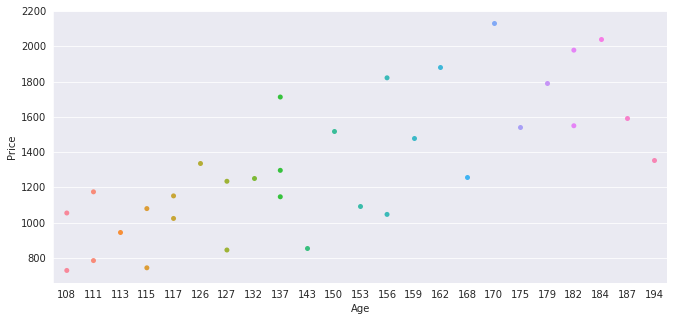

In [115]:
sns.swarmplot(x=df["Age"], y=df["Price"])

In [116]:
plt.figure(figsize=(10,5))
px.scatter(df, x=df["Age"], y=df["Price"], opacity=0.75, trendline='ols', trendline_color_override='darkblue', width=800, height=400)

<Figure size 720x360 with 0 Axes>

***We can see from the previous two plots that as the age of the clocks increase so do the prices at which they're sold.***

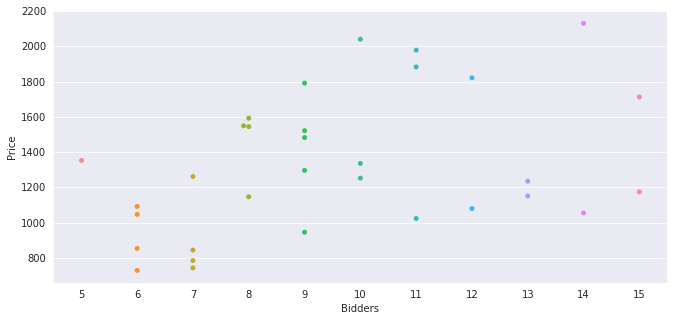

In [117]:
sns.swarmplot(x=df["Bidders"], y=df["Price"])

In [118]:
plt.figure(figsize=(10,5))
px.scatter(df, x=df["Bidders"], y=df["Price"], opacity=0.75, trendline='ols', trendline_color_override='darkblue', width=800, height=400)

<Figure size 720x360 with 0 Axes>

**We can see a similar, positive relationship b/w no. of bidders and the prices at which they're sold.**

Q1- Age and bidders both have a positive relationship with the price.

In [49]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Bidders', z='Price')
fig.show()

##### Multiple Reg.

In [119]:
#separate the other attributes from the predicting attribute
x = df.drop('Price',axis=1)

#separte the predicting attribute into Y for model training 
y = df['Price']

In [120]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [121]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [122]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 642.89243791, 1074.5490093 ,  449.90096357, 1719.79102213,
       1146.72966791,  793.16682396, 1626.96550953])

In [123]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5247944618764089
mean_sqrd_error is = 43523.726106140275
root_mean_squared error of is = 208.62340737831954


In [124]:
# running a prediction

LR.predict([[150,10]])# If 150 is the age of the clock and 10 is the number of bidders

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1428.11185325])

Q2
***(A) No, the model is not useful. We judge the accuracy of the model using R square value which is 0.5. The model is only 50% accurate.***

In [125]:
print('r2 score is ',score)

r2 score is  0.5247944618764089


In [95]:
##########

In [126]:
print(LR.coef_)#m1 and m2
print(LR.intercept_)#intercept

[14.73178516 89.86897819]
-1680.3457033527147


(B) We can find the price using the multiple reg eqn.

Price = m1*(Age) + m2*(Bidders) + b

**Price = 13.777(Age) + 91.3177(Bidders=1) + -1553.36**

In [127]:
14.73178516*150 + 89.86897819*10 - 1680.3457033527147

1428.1118525472853

In [128]:
############

(C) An auction house has acquired several grandfather clocks each 100 years old paying an
average price of £500 per clock. From the past experience it has found that such
auctions (for antique grandfather clocks) typically attract about 10-12 bidders. What
can be said about its expected profit per clock with 95% confidence?

In [129]:
print(LR.predict([[100,10]])- 500)
print(LR.predict([[100,12]]) - 500)

[191.52259502]
[371.2605514]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



***(C) Expected profit of each clock should be b/w 371 and 191 pounds.***

In [62]:
##########

(D) You walk into an auction selling an antique 150 year old grandfather clock and find that
there are 15 bidders (including yourself) participating in the auction. You are
extremely keen in acquiring the clock. At least what amount should you bid for the
clock, so that, you are 99% certain that nobody else can out-bid you? 

In [130]:
LR.predict([[150,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1877.4567442])

***You should pay around 1877.45 pounds***

In [61]:
##########

E. In presence of the other, which of the two factors, age of the clock or the number of bidders,
is more important in determining the selling price of a clock?

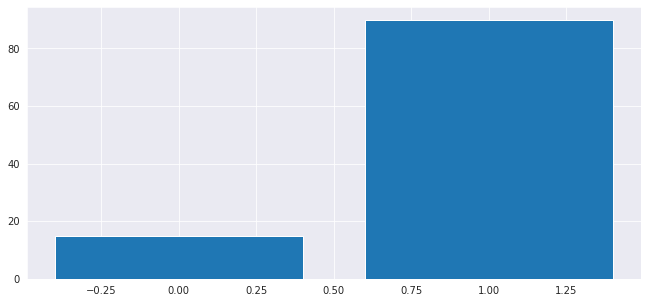

In [131]:
importance=LR.coef_
importance=np.sort(importance)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

***Number of bidders is a much more of an important feature in determining the price of the clock***

In [66]:
#############

3. Is the first order model acceptable? Fit as appropriate a model as possible for the auctioned
selling price of grandfather clocks, based on the information on the age of the clock and
the number of bidders, and then based on this model answer the same questions as in 2.
b, c, and d above. 

***No. an R2 of 0.5 indicates that 50% of the variability in the outcome data cannot be explained by the model***

***To fit as appropriate a model as possible we train the model using as much of the data points as possible***

In [132]:
#separate the other attributes from the predicting attribute
x = df.drop('Price',axis=1)

#separte the predicting attribute into Y for model training 
y = df['Price']

In [133]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [134]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [135]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 670.24299442, 1095.7458431 ,  482.48457348, 1684.63590027])

In [136]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.7279362467533059
mean_sqrd_error is = 35514.70923327068
root_mean_squared error of is = 188.4534670237475


***We can see here that we've improved the R2 value by quite a bit***

**new improved model**

(B) Price = m1*(Age) + m2*(Bidders) + b

***Price = 13.77724142*(Age) + 91.31773104*(Bidders) -1553.363885579887***





In [137]:
print(LR.coef_)
print(LR.intercept_)

[13.77724142 91.31773104]
-1553.363885579887


In [138]:
print(LR.predict([[100,10]])- 500)
print(LR.predict([[100,12]]) - 500)

[237.53756631]
[420.17302839]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



***(C) Expected profit of each clock should be b/w 420 and 237 pounds.***

In [139]:
LR.predict([[150,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1882.98829226])

***(D) You should pay about 1882 pounds***